In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./data/indicateur_victimation_et_insécurité.xlsx', engine='openpyxl', skiprows=7,nrows=19)
getYears = df[['INDICATEURS/PERIODE', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]
getYears

,INDICATEURS/PERIODE,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,nombre de cambriolages et tentatives de cambri...,457000,554000,559000,584000,602000,536000,507000,624000,557000
1,nombre de vols sans effraction visant les rési...,302000,296000,287000,254000,307000,320000,277000,289000,331000
2,nombre d'actes de vandalisme contre le logement,1420000,1453000,1241000,1283000,1273000,1307000,1117000,966000,1184000
3,nombre de vols et tentatives de vols de voiture,395000,294000,270000,294000,242000,263000,263000,232000,209000
4,nombre de vols et tentatives de vols de deux-r...,96000,142000,77000,134000,83000,126000,93000,72000,44000
5,nombre de vols et tentatives de vol de vélo,318000,314000,314000,401000,405000,349000,387000,403000,361000
6,nombre de vols d'objet dans ou sur la voiture,874000,830000,854000,833000,813000,663000,650000,775000,663000
7,nombre d'actes de vandalisme contre la voiture,1935000,1691000,1731000,1693000,1672000,1602000,1458000,1653000,1337000
8,nombre de victimes de vols ou tentatives de vo...,940000,847000,858000,937000,969000,798000,753000,1096000,967000
9,nombre de victimes de vols ou tentatives de vo...,300000,274000,306000,372000,195000,245000,186000,210000,166000


In [3]:
violenceOutdoor = getYears.loc[[11, 12]]
violenceOutdoor = pd.Series(violenceOutdoor[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]].sum())
violenceOutdoor =pd.DataFrame(violenceOutdoor)

violenceOutdoor.columns=["nombre de victimes de violences physiques/sexuelles hors ménage"]
violenceOutdoor = violenceOutdoor.T
violenceOutdoor = violenceOutdoor.reset_index()
violenceOutdoor =violenceOutdoor.rename({'index': 'INDICATEURS/PERIODE'}, axis=1)
violenceOutdoor

In [4]:
robbery = getYears.iloc[[0,3,4,5,13],:]
robbery = pd.DataFrame(robbery)
robbery = robbery[1:]

df2 =[violenceOutdoor,robbery]
result = pd.concat(df2,sort=True)
result

,2010,2011,2012,2013,2014,2015,2016,2017,2018,INDICATEURS/PERIODE
0,788000,837000,900000,823000,909000,910000,810000,948000,906000,nombre de victimes de violences physiques/sexu...
3,395000,294000,270000,294000,242000,263000,263000,232000,209000,nombre de vols et tentatives de vols de voiture
4,96000,142000,77000,134000,83000,126000,93000,72000,44000,nombre de vols et tentatives de vols de deux-r...
5,318000,314000,314000,401000,405000,349000,387000,403000,361000,nombre de vols et tentatives de vol de vélo
13,330000,397000,425000,349000,446000,317000,285000,408000,359000,nombre de victimes de violences physiques et/o...


In [5]:
firstTiers = result.iloc[:, 0:4]
firstTiers = pd.DataFrame(firstTiers)
firstTiers['Total'] = firstTiers.sum(axis=1)

secondTiers = result.iloc[:, [0,4,5,6]]
secondTiers = pd.DataFrame(secondTiers)
secondTiers['Total'] = secondTiers.sum(axis=1)

lastTiers = result.iloc[:,[0,7,8,9]]
lastTiers = pd.DataFrame(lastTiers)
lastTiers['Total'] = lastTiers.sum(axis=1)

/tmp/ipykernel_4730/2171373761.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lastTiers['Total'] = lastTiers.sum(axis=1)


KeyError: 'INDICATEURS/PERIODE'

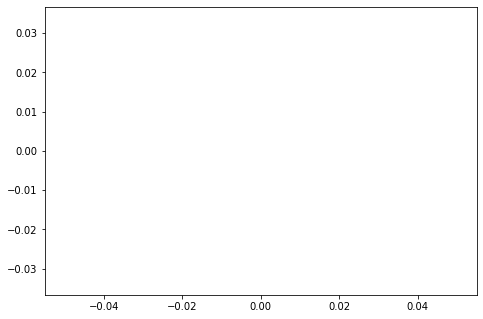

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
x = firstTiers["INDICATEURS/PERIODE"]
y= firstTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.title("Victimisation des ménages entre 2010 et 2012")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
x = secondTiers["INDICATEURS/PERIODE"]
y= secondTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.legend(x ,bbox_to_anchor=(1,0))
plt.title("Victimisation des ménages entre 2013 et 2015")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
x = lastTiers["INDICATEURS/PERIODE"]
y= lastTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.title("Victimisation des ménages entre 2016 et 2018")
plt.show()